# NOAA PMEL CO2 Mooring data example
Created by Sophie Chu of NOAA PMEL and modified by Nancy Williams of USF CMS for use with Ocean Biogeochemical Dynamics Lab course
- Downloading data via url
- Creating a dataframe using pandas
- Calculating monthly means and standard deviations
- Plotting using matplotlib
- Decomposing pCO2 seasonality into thermal and nonthermal components

In [1]:
# import libraries needed for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
output_dir='generated/' # define where you want your figures to go

In [3]:
# Make a function for data download via url

def download_url(url):
  print("downloading: ",url)
  # assumes that the last segment after the / represents the file name
  # if url is abc/xyz/file.txt, the file name will be file.txt
  file_name_start_pos = url.rfind("/") + 1
  file_name = url[file_name_start_pos:]
 
  r = requests.get(url, stream=True)
  if r.status_code == requests.codes.ok:
    with open(file_name, 'wb') as f:
      for data in r:
        f.write(data)

In [4]:
# Use above function to download data via url and save file
# Let's start with the KEO mooring off of Hawaii.
download_url("https://www.pmel.noaa.gov/co2/timeseries/KEO.txt")

downloading:  https://www.pmel.noaa.gov/co2/timeseries/KEO.txt


In [5]:
# read text file into dataframe
keo = pd.read_table('KEO.txt', delim_whitespace=True, comment ='#', header=0,
                       names=('date','time', 'SST', 'SSS', 'pCO2_sw', 'pCO2_air', 'xCO2_air', 'pH_sw'))

In [6]:
# take a quick look at the beginning and end of the dataframe
keo.head

<bound method NDFrame.head of              date   time     SST     SSS  pCO2_sw  pCO2_air  xCO2_air  pH_sw
0      2007-09-26  10:07  28.109  34.229    365.4     365.8     378.8    NaN
1      2007-09-26  10:37  28.038  34.214    364.7     366.5     379.3    NaN
2      2007-09-26  15:16  28.064  34.233    363.9     366.7     379.4    NaN
3      2007-09-26  18:16  28.046  34.242    366.3     366.2     379.0    NaN
4      2007-09-26  21:16  28.029  34.237    366.4     367.0     379.5    NaN
...           ...    ...     ...     ...      ...       ...       ...    ...
24958  2017-07-14  09:16  26.627  34.606    424.6     393.9     409.2    NaN
24959  2017-07-14  12:16  26.675  34.628    420.7     394.1     409.2    NaN
24960  2017-07-14  15:16  26.661  34.627    426.3     393.8     409.4    NaN
24961  2017-07-14  18:16  26.699  34.631    428.1     393.6     409.4    NaN
24962  2017-07-14  21:16  26.466  34.634    423.0     393.4     409.0    NaN

[24963 rows x 8 columns]>

In [7]:
# function to define data time as index and add depth and month columns

def surfdf (_df, date, time, dpth):
    _df['datetime64_ns'] = pd.to_datetime(_df.date+ ' ' + _df.time) # combine date and time into one column
    _df.index = _df.datetime64_ns # set datetime column as index
    _df['Depth'] = dpth # add depth of surface measurements as column
    _df['month'] = _df['datetime64_ns'].dt.month.values #make month column
    
    return _df

# apply function to dataframe

df_keo = surfdf(keo, keo.date, keo.time, 0.5)

In [8]:
# take a quick look at the beginning and end of the new dataframe
df_keo.head

<bound method NDFrame.head of                            date   time     SST     SSS  pCO2_sw  pCO2_air  \
datetime64_ns                                                               
2007-09-26 10:07:00  2007-09-26  10:07  28.109  34.229    365.4     365.8   
2007-09-26 10:37:00  2007-09-26  10:37  28.038  34.214    364.7     366.5   
2007-09-26 15:16:00  2007-09-26  15:16  28.064  34.233    363.9     366.7   
2007-09-26 18:16:00  2007-09-26  18:16  28.046  34.242    366.3     366.2   
2007-09-26 21:16:00  2007-09-26  21:16  28.029  34.237    366.4     367.0   
...                         ...    ...     ...     ...      ...       ...   
2017-07-14 09:16:00  2017-07-14  09:16  26.627  34.606    424.6     393.9   
2017-07-14 12:16:00  2017-07-14  12:16  26.675  34.628    420.7     394.1   
2017-07-14 15:16:00  2017-07-14  15:16  26.661  34.627    426.3     393.8   
2017-07-14 18:16:00  2017-07-14  18:16  26.699  34.631    428.1     393.6   
2017-07-14 21:16:00  2017-07-14  21:16  26.466

In [9]:
# take a quick look at the different data types of variables in the data frame
df_keo.dtypes

date                     object
time                     object
SST                     float64
SSS                     float64
pCO2_sw                 float64
pCO2_air                float64
xCO2_air                float64
pH_sw                   float64
datetime64_ns    datetime64[ns]
Depth                   float64
month                     int64
dtype: object

<AxesSubplot:xlabel='datetime64_ns'>

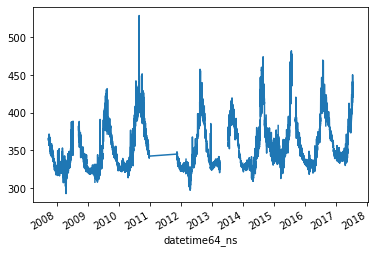

In [10]:
# quick plot
df_keo.pCO2_sw.plot()

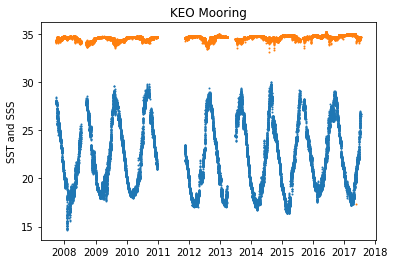

In [11]:
# plotting SST and SSS on one plot
fig, ax = plt.subplots()
im = ax.scatter(df_keo.index, df_keo.SST, s=1)
im2 = ax.scatter(df_keo.index,df_keo.SSS, s=1)
ax.set_ylabel('SST and SSS') # fontsize=fs)
plt.title('KEO Mooring')
plt.savefig(output_dir+'keo_ts.png', bbox_inches='tight', dpi=600) # saves plot as image file
plt.show() # displays plot

In [12]:
# get average monthly values for dataset
df_keo_avgmonth = df_keo.groupby('month').agg(['mean', 'std', 'count'])
df_keo_avgmonth # displays the results

SST                        SSS                     pCO2_sw  \
            mean       std count       mean       std count        mean   
month                                                                     
1      19.136699  0.792193  2232  34.730916  0.100464  2232  330.476527   
2      18.007056  0.741311  1929  34.746481  0.094463  1929  331.609727   
3      17.941976  0.721038  2231  34.742434  0.082884  2227  330.995229   
4      18.661310  0.869936  1922  34.763021  0.092509  1924  325.708788   
5      20.281901  0.925121  1981  34.694978  0.414063  1981  339.814021   
6      22.446310  1.190959  1924  34.591723  0.169670  1920  358.608410   
7      25.810544  1.457940  1907  34.391685  0.190901  1907  396.162466   
8      27.731054  0.861826  1622  34.320233  0.249940  1621  406.543847   
9      27.513976  1.041247  1789  34.350588  0.200214  1734  389.549619   
10     25.646666  0.945458  2250  34.443622  0.188403  2249  368.316515   
11     23.379585  0.945612  2300  34.527707  0.210881  2300  349.302637   
12     21.176325  0.846674  2421  34.634662  0.153808  2414  334.829703   

                          pCO2_air  ...          xCO2_air                  \
             std count        mean  ... count        mean       std count   
month                               ...                                     
1       7.859439  2194  390.582585  ...  2228  398.932271  6.867154  2228   
2       7.305368  1871  392.552445  ...  1922  399.753960  6.891193  2033   
3       7.537046  2159  392.982507  ...  2218  400.519793  7.065518  2223   
4      11.589106  1889  392.726159  ...  1919  400.658805  7.512770  1925   
5      16.016037  1940  389.212828  ...  1980  399.191574  7.365113  1982   
6      18.851233  1855  383.322520  ...  1905  395.469608  7.725299  1915   
7      27.997141  1865  379.328926  ...  1891  392.455303  7.592359  2065   
8      18.048526  1544  374.605810  ...  1618  390.552945  6.060776  1766   
9      15.396238  1707  373.803637  ...  1732  388.572105  5.583873  1796   
10     15.248646  2192  378.267068  ...  2244  390.990379  6.633016  2245   
11     11.433442  2237  383.598433  ...  2297  394.170178  6.659223  2297   
12      8.187856  2360  387.346349  ...  2410  396.982375  6.817494  2417   

          pH_sw                 Depth             
           mean       std count  mean  std count  
month                                             
1      8.112457  0.016542   566   0.5  0.0  2232  
2      8.123022  0.015348   321   0.5  0.0  2040  
3      8.126740  0.006594   247   0.5  0.0  2232  
4      8.126146  0.022719   255   0.5  0.0  1927  
5      8.097967  0.024252   570   0.5  0.0  1983  
6      8.089625  0.021236   461   0.5  0.0  1931  
7      8.044051  0.029985   671   0.5  0.0  2080  
8      8.021422  0.013735   496   0.5  0.0  1769  
9      8.039432  0.018155   638   0.5  0.0  1798  
10     8.064482  0.010881   734   0.5  0.0  2250  
11     8.090819  0.013853   848   0.5  0.0  2300  
12     8.108296  0.011014   764   0.5  0.0  2421  

[12 rows x 21 columns]

In [13]:
df_keo_avgmonth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (SST, mean)        12 non-null     float64
 1   (SST, std)         12 non-null     float64
 2   (SST, count)       12 non-null     int64  
 3   (SSS, mean)        12 non-null     float64
 4   (SSS, std)         12 non-null     float64
 5   (SSS, count)       12 non-null     int64  
 6   (pCO2_sw, mean)    12 non-null     float64
 7   (pCO2_sw, std)     12 non-null     float64
 8   (pCO2_sw, count)   12 non-null     int64  
 9   (pCO2_air, mean)   12 non-null     float64
 10  (pCO2_air, std)    12 non-null     float64
 11  (pCO2_air, count)  12 non-null     int64  
 12  (xCO2_air, mean)   12 non-null     float64
 13  (xCO2_air, std)    12 non-null     float64
 14  (xCO2_air, count)  12 non-null     int64  
 15  (pH_sw, mean)      12 non-null     float64
 16  (pH_sw, std)       12 non-nu

#### *Note: Ideally, we would detrend this pCO2 data first, because we know that atospheric pCO2 increases each year (https://www.esrl.noaa.gov/gmd/ccgg/trends/) and that the ocean generally increases at a similar pace. For this analysis, it will not be important but it is best practice to detrend your data before calculating monthly climatological seasonal cycles.

In [14]:
# find max monthly mean
df_keo_avgmonth.pCO2_sw['mean'].max()

406.5438471502599

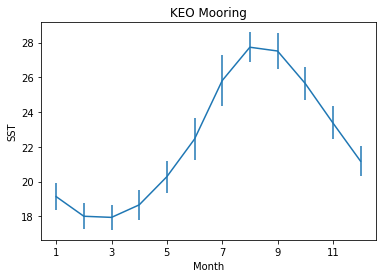

In [15]:
# plot monthly average SST
fig, ax = plt.subplots()
im = ax.errorbar(df_keo_avgmonth.index, df_keo_avgmonth.SST['mean'], 
                df_keo_avgmonth.SST['std'])#, marker= 's', color='C0',elinewidth=1, linewidth=3)
ax.set_xlabel('Month')#, fontsize=fs)
ax.set_ylabel('SST')#, fontsize=fs)
ax.set_xticks(np.arange(1, 13, step=2))
plt.title('KEO Mooring')
plt.savefig(output_dir+'keo_avgmonth_sst.png', bbox_inches='tight', dpi=600)
plt.show() # displays plot

Next, we want to calculate solubility-related changes in pCO2,'thermal component' and decompose from the non-thermal component. First, let's look at the monthly pCO2 data.

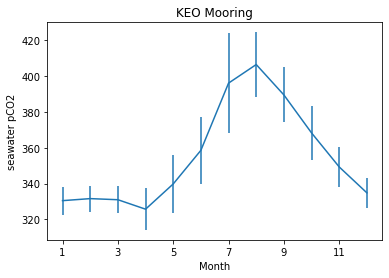

In [16]:
# plot monthly averages for pCO2
fig, ax = plt.subplots()
im = ax.errorbar(df_keo_avgmonth.index, df_keo_avgmonth.pCO2_sw['mean'], 
                df_keo_avgmonth.pCO2_sw['std'])#, marker= 's', color='C0',elinewidth=1, linewidth=3)
ax.set_xlabel('Month')#, fontsize=fs)
ax.set_ylabel('seawater pCO2')#, fontsize=fs)
ax.set_xticks(np.arange(1, 13, step=2))
plt.title('KEO Mooring')
plt.savefig(output_dir+'keo_avgmonth_pCO2sw.png', bbox_inches='tight', dpi=600)
plt.show() # displays plot

In [17]:
# Decomposing the thermal and nonthermal components of pCO2
SSTi=df_keo.SST[0]
pCO2_swi=df_keo.pCO2_sw[0]
pCO2_thermal=pCO2_swi+pCO2_swi*.0423*(df_keo.SST-SSTi) # 0.0423 as per Takahashi et al. (1993)

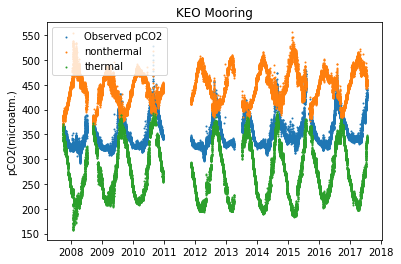

In [18]:
# plotting pCO2 and pCO2thermal on one plot
fig, ax = plt.subplots()
im = ax.scatter(df_keo.index, df_keo.pCO2_sw,label='Observed pCO2', s=1)
im3 = ax.scatter(df_keo.index, df_keo.pCO2_sw-pCO2_thermal+pCO2_swi,label='nonthermal', s=1)
im2 = ax.scatter(df_keo.index, pCO2_thermal,label='thermal', s=1)
ax.set_ylabel('pCO2(microatm.)') # fontsize=fs)
ax.legend()
plt.title('KEO Mooring')
plt.savefig(output_dir+'keo_pCO2thermal.png', bbox_inches='tight', dpi=600) # saves plot as image file
plt.show() # displays plot

### Is pCO2 at KEO driven more by thermal or nonthermal (biophysical) effects?

Now, let's compare to another mooring. You can go to https://www.pmel.noaa.gov/co2/story/CO2+Data+Discovery and find another mooring. Try to find one where the biophysical effects dominate. Where do you think you might find such a mooring?

In [19]:
# Dynamically define the new mooring name
MooringName='BTM'
download_url("https://www.pmel.noaa.gov/co2/timeseries/"+MooringName+".txt")

downloading:  https://www.pmel.noaa.gov/co2/timeseries/BTM.txt


In [20]:
# read text file into dataframe
Mooring = pd.read_table(MooringName+'.txt', delim_whitespace=True, comment ='#', header=0,
                       names=('date','time', 'SST', 'SSS', 'pCO2_sw', 'pCO2_air', 'xCO2_air', 'pH_sw'))

<AxesSubplot:xlabel='datetime64_ns'>

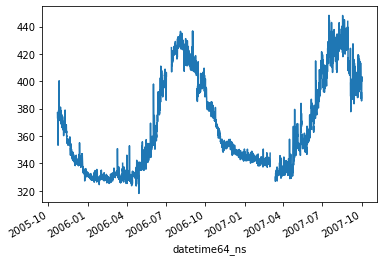

In [21]:
# apply function to dataframe (this function was defined earlier in the code)
df_Mooring = surfdf(Mooring, Mooring.date, Mooring.time, 0.5)
# quick plot
df_Mooring.pCO2_sw.plot()

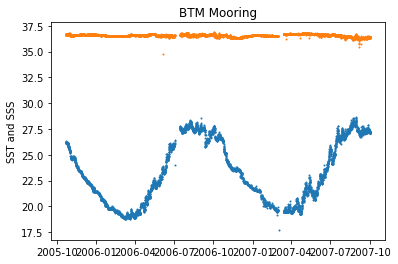

In [22]:
# plotting SST and SSS on one plot
fig, ax = plt.subplots()
im = ax.scatter(df_Mooring.index, df_Mooring.SST, s=1)
im2 = ax.scatter(df_Mooring.index,df_Mooring.SSS, s=1)
ax.set_ylabel('SST and SSS') # fontsize=fs)
plt.savefig(output_dir+MooringName+'_ts.png', bbox_inches='tight', dpi=600) # saves plot as image file
plt.title(MooringName+' Mooring')
plt.show() # displays plot

In [23]:
# get average monthly values for dataset
df_Mooring_avgmonth = df_Mooring.groupby('month').agg(['mean', 'std', 'count'])
# find max monthly mean
df_Mooring_avgmonth.pCO2_sw['mean'].max()

423.1156504065041

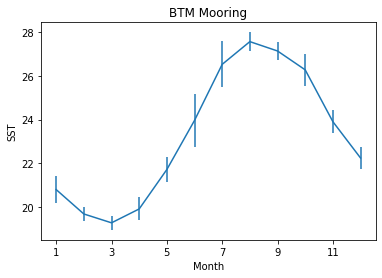

In [24]:
# plot monthly average SST
fig, ax = plt.subplots()
im = ax.errorbar(df_Mooring_avgmonth.index, df_Mooring_avgmonth.SST['mean'], 
                df_Mooring_avgmonth.SST['std'])#, marker= 's', color='C0',elinewidth=1, linewidth=3)
ax.set_xlabel('Month')#, fontsize=fs)
ax.set_ylabel('SST')#, fontsize=fs)
ax.set_xticks(np.arange(1, 13, step=2))
plt.title(MooringName+' Mooring')
plt.savefig(output_dir+MooringName+'_avgmonth_sst.png', bbox_inches='tight', dpi=600)
plt.show() # displays plot

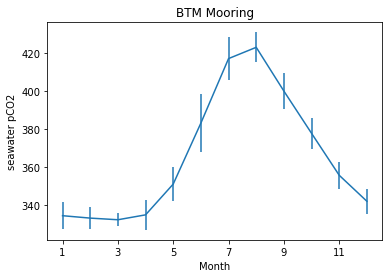

In [25]:
# plot monthly averages for pCO2
fig, ax = plt.subplots()
im = ax.errorbar(df_Mooring_avgmonth.index, df_Mooring_avgmonth.pCO2_sw['mean'], 
                df_Mooring_avgmonth.pCO2_sw['std'])#, marker= 's', color='C0',elinewidth=1, linewidth=3)
ax.set_xlabel('Month')#, fontsize=fs)
ax.set_ylabel('seawater pCO2')#, fontsize=fs)
ax.set_xticks(np.arange(1, 13, step=2))
plt.title(MooringName+' Mooring')
plt.savefig(output_dir+MooringName+'_avgmonth_pCO2sw.png', bbox_inches='tight', dpi=600)
plt.show() # displays plot

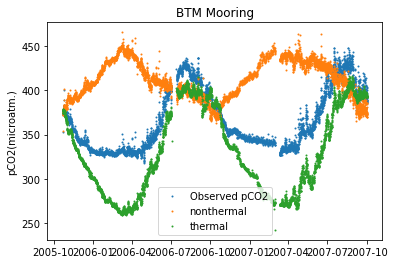

In [26]:
# Decomposing the thermal and nonthermal components of pCO2
SSTi=df_Mooring.SST[0]
pCO2_swi=df_Mooring.pCO2_sw[0]
pCO2_thermal=pCO2_swi+pCO2_swi*.0423*(df_Mooring.SST-SSTi) # 0.0423 as per Takahashi et al. (1993)

# plotting pCO2 and pCO2thermal on one plot
fig, ax = plt.subplots()
im = ax.scatter(df_Mooring.index, df_Mooring.pCO2_sw,label='Observed pCO2', s=1)
im3 = ax.scatter(df_Mooring.index, df_Mooring.pCO2_sw-pCO2_thermal+pCO2_swi,label='nonthermal', s=1)
im2 = ax.scatter(df_Mooring.index, pCO2_thermal,label='thermal', s=1)
ax.set_ylabel('pCO2(microatm.)') # fontsize=fs)
ax.legend()
plt.title(MooringName+' Mooring')
plt.savefig(output_dir+MooringName+'_pCO2thermal.png', bbox_inches='tight', dpi=600) # saves plot as image file
plt.show() # displays plot